In [1]:
from CartPole import CartPole, _remap_angle, remap_angle, _loss, loss
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [2]:
# ######### EXERCISE 1.1

# ## function to return a list of steps and a list of states (-list of lists)
def rollout(initial_state, steps):
    
    # create instance of Cartpole with initial_state
    pendulum = CartPole()
    pendulum.setState(initial_state)
    
    # create list of steps
    list_of_steps = list(range(steps+1))

    # start list of states
    list_of_states = [initial_state]

    # iterate to complete simulation
    for step in range(steps):

        # update state
        pendulum.performAction()

        # append current state
        list_of_states.append(pendulum.getState())

    return list_of_steps, list_of_states




# initialising parameters for exercise 1.1

# the following is for oscillations about stable equilibrium
initial_cart_location = 0
initial_cart_velocity = 1
initial_pole_angle = np.pi
initial_pole_velocity = 5

# # the following is for complete rotation of pendulum
# initial_cart_location = 0
# initial_cart_velocity = 1
# initial_pole_angle = np.pi
# initial_pole_velocity = 15


initial_state = [initial_cart_location, initial_cart_velocity, initial_pole_angle, initial_pole_velocity]
steps = 50

steps_to_plot, states_to_plot = rollout(initial_state, steps)
cart_locations_to_plot = [state[0] for state in states_to_plot]
cart_velocities_to_plot = [state[1] for state in states_to_plot]
#pole_angles_to_plot = [_remap_angle(state[2]) for state in states_to_plot]
pole_angles_to_plot = [state[2] for state in states_to_plot] # probably better with this one
pole_velocities_to_plot = [state[3] for state in states_to_plot]


## plots of state variables over time

plt.subplot(2, 2, 1)
plt.plot(steps_to_plot, cart_locations_to_plot)
plt.title('Time against cart location')
plt.xlabel('Iteration count')
plt.ylabel('Cart location')

plt.subplot(2, 2, 2)
plt.plot(steps_to_plot, cart_velocities_to_plot)
plt.title('Time against cart velocity')
plt.xlabel('Iteration count')#
plt.ylabel('Cart velocity')

plt.subplot(2, 2, 3)
plt.plot(steps_to_plot, pole_angles_to_plot)
plt.title('Time against pole angle')
plt.xlabel('Iteration count')
plt.ylabel('Pole angle')

plt.subplot(2, 2, 4)
plt.plot(steps_to_plot, pole_velocities_to_plot)
plt.title('Time against pole velocity')
plt.xlabel('Iteration count')
plt.ylabel('Pole velocity')


plt.suptitle('Graphs showing how each state variable changes over time for complete rotations of the pendulum')

plt.tight_layout()
plt.show()


# plots of variables against each other

plt.subplot(2, 3, 1)
plt.plot(cart_locations_to_plot, cart_velocities_to_plot)
plt.title('Cart location against cart velocity')
plt.xlabel('Cart location')
plt.ylabel('Cart velocity')

plt.subplot(2, 3, 2)
plt.plot(cart_locations_to_plot, pole_angles_to_plot)
plt.title('Cart location against pole angle')
plt.xlabel('Cart location')
plt.ylabel('Pole angle')

plt.subplot(2, 3, 3)
plt.plot(cart_locations_to_plot, pole_velocities_to_plot)
plt.title('Cart location against pole velocity')
plt.xlabel('Cart location')
plt.ylabel('Pole velocity')

plt.subplot(2, 3, 4)
plt.plot(cart_velocities_to_plot, pole_angles_to_plot)
plt.title('Cart velocity against pole angle')
plt.xlabel('Cart velocity')
plt.ylabel('Pole angle')

plt.subplot(2, 3, 5)
plt.plot(cart_velocities_to_plot, pole_velocities_to_plot)
plt.title('Cart velocity against pole velocity')
plt.xlabel('Cart velocity')
plt.ylabel('Pole velocity')


plt.subplot(2, 3, 6)
plt.plot(pole_angles_to_plot, pole_velocities_to_plot)
plt.title('Pole angle against pole velocity')
plt.xlabel('Pole angle')
plt.ylabel('Pole velocity')

for ax in plt.gcf().get_axes():
    ax.title.set_rotation(10)

plt.suptitle('Graphs showing how each state variable varies with respect to one another for oscillations about stable equilibrium')
plt.tight_layout()
plt.show()



# ###### NOTE TO SELF
# # everything should be done, just plot the different graphs and put in report.
# #
# # note that to make the plots involving pole angles, play around with putting _remap_angle() surrounding state[2] in
# # the line that does list comprehension for pole angles to plot

    

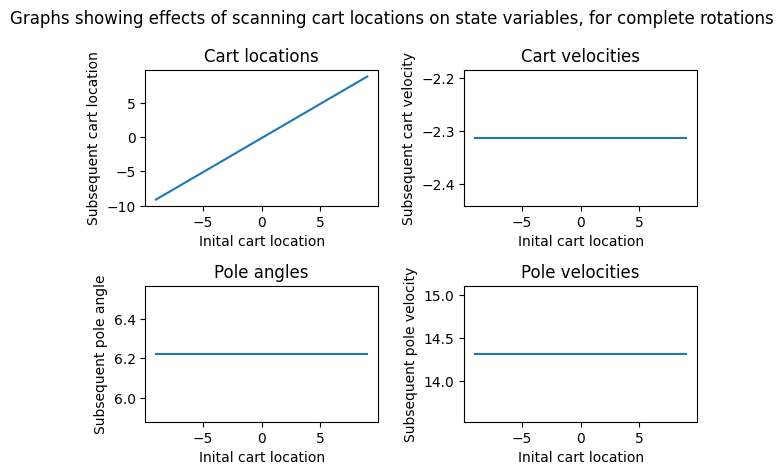

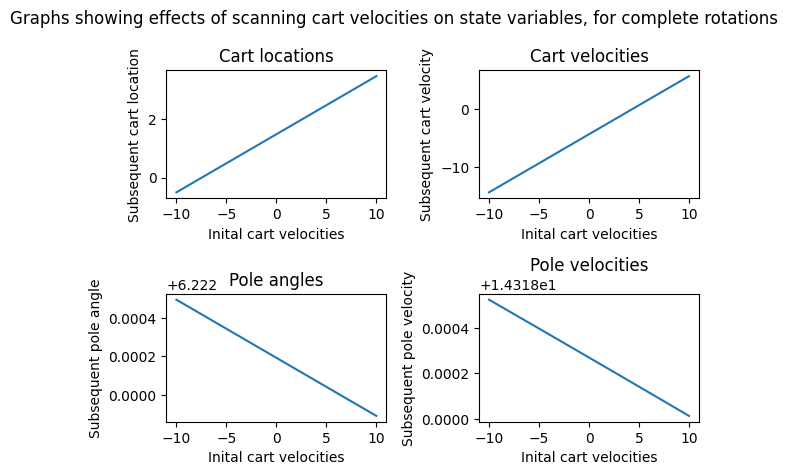

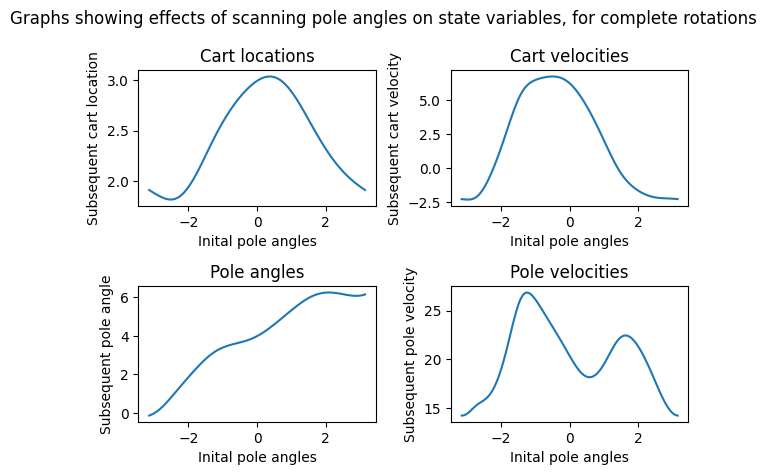

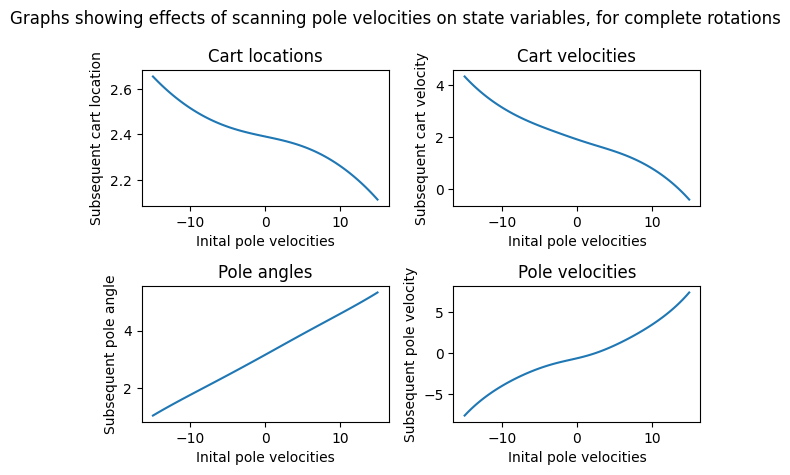

In [4]:
# # # ########### EXERCISE 1.2a: scans showing values of subsequent state variables


# X locations to plot
X_cart_locations_to_plot = np.linspace(-9, 9, 100)
X_cart_velocities_to_plot = np.linspace(-10, 10, 100)
X_pole_angles_to_plot = np.linspace(-np.pi, np.pi, 100)
X_pole_velocities_to_plot = np.linspace(-15, 15, 100)


# create instance
pendulum = CartPole()





### when wanting to plot graphs for the case of oscillations or rotations, need to comment out the initial
### condition declerations under each heading "SCAN CART LOCATIONS", "SCAN CART VELOCITIES" etc.

## SCAN CART LOCATIONS

# initialise empty Y locations to plot
Y_cart_locations_to_plot, Y_cart_velocities_to_plot, Y_pole_angles_to_plot, Y_pole_velocities_to_plot = [], [], [], []

# # initialise state variables and state, OSCILLATIONS
# cart_location = 2
# cart_velocity = 2
# pole_angle = np.pi + 0.1 
# pole_velocity = 5
# state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations, ROTATIONS
cart_location = 2
cart_velocity = 2
pole_angle = np.pi + 0.1 
pole_velocity = 20
state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations
for new_location in X_cart_locations_to_plot:
    state[0] = new_location

    # get new state
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()

    # append new state variables to list
    Y_cart_locations_to_plot.append(new_state[0])
    Y_cart_velocities_to_plot.append(new_state[1])
    Y_pole_angles_to_plot.append(new_state[2])
    Y_pole_velocities_to_plot.append(new_state[3])


plt.subplot(2, 2, 1)
plt.plot(X_cart_locations_to_plot, Y_cart_locations_to_plot)
plt.title('Cart locations')
plt.xlabel('Inital cart location')
plt.ylabel('Subsequent cart location')

plt.subplot(2, 2, 2)
plt.plot(X_cart_locations_to_plot, Y_cart_velocities_to_plot)
plt.title('Cart velocities')
plt.xlabel('Inital cart location')
plt.ylabel('Subsequent cart velocity')

plt.subplot(2, 2, 3)
plt.plot(X_cart_locations_to_plot, Y_pole_angles_to_plot)
plt.title('Pole angles')
plt.xlabel('Inital cart location')
plt.ylabel('Subsequent pole angle')

plt.subplot(2, 2, 4)
plt.plot(X_cart_locations_to_plot, Y_pole_velocities_to_plot)
plt.title('Pole velocities')
plt.xlabel('Inital cart location')
plt.ylabel('Subsequent pole velocity')

plt.suptitle('Graphs showing effects of scanning cart locations on state variables, for complete rotations')
plt.tight_layout()
plt.show()









## SCAN CART VELOCITIES

# initialise empty Y locations to plot
Y_cart_locations_to_plot, Y_cart_velocities_to_plot, Y_pole_angles_to_plot, Y_pole_velocities_to_plot = [], [], [], []

# # initialise state variables and state, OSCILLATIONS
# cart_location = 2
# cart_velocity = 2
# pole_angle = np.pi + 0.1 
# pole_velocity = 5
# state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations, ROTATIONS
cart_location = 2
cart_velocity = 2
pole_angle = np.pi + 0.1 
pole_velocity = 20
state = [cart_location, cart_velocity, pole_angle, pole_velocity]


# scan over cart locations
for new_velocity in X_cart_velocities_to_plot:
    state[1] = new_velocity

    # get new state
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()

    # append new state variables to list
    Y_cart_locations_to_plot.append(new_state[0])
    Y_cart_velocities_to_plot.append(new_state[1])
    Y_pole_angles_to_plot.append(new_state[2])
    Y_pole_velocities_to_plot.append(new_state[3])


plt.subplot(2, 2, 1)
plt.plot(X_cart_velocities_to_plot, Y_cart_locations_to_plot)
plt.title('Cart locations')
plt.xlabel('Inital cart velocities')
plt.ylabel('Subsequent cart location')

plt.subplot(2, 2, 2)
plt.plot(X_cart_velocities_to_plot, Y_cart_velocities_to_plot)
plt.title('Cart velocities')
plt.xlabel('Inital cart velocities')
plt.ylabel('Subsequent cart velocity')

plt.subplot(2, 2, 3)
plt.plot(X_cart_velocities_to_plot, Y_pole_angles_to_plot)
plt.title('Pole angles')
plt.xlabel('Inital cart velocities')
plt.ylabel('Subsequent pole angle')

plt.subplot(2, 2, 4)
plt.plot(X_cart_velocities_to_plot, Y_pole_velocities_to_plot)
plt.title('Pole velocities')
plt.xlabel('Inital cart velocities')
plt.ylabel('Subsequent pole velocity')

plt.suptitle('Graphs showing effects of scanning cart velocities on state variables, for complete rotations')
plt.tight_layout()
plt.show()






## SCAN POLE ANGLES

# initialise empty Y locations to plot
Y_cart_locations_to_plot, Y_cart_velocities_to_plot, Y_pole_angles_to_plot, Y_pole_velocities_to_plot = [], [], [], []

# # initialise state variables and state, OSCILLATIONS
# cart_location = 2
# cart_velocity = 2
# pole_angle = np.pi + 0.1 
# pole_velocity = 5
# state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations, ROTATIONS
cart_location = 2
cart_velocity = 2
pole_angle = np.pi + 0.1 
pole_velocity = 20
state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations
for new_angle in X_pole_angles_to_plot:
    state[2] = new_angle

    # get new state
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()

    # append new state variables to list
    Y_cart_locations_to_plot.append(new_state[0])
    Y_cart_velocities_to_plot.append(new_state[1])
    Y_pole_angles_to_plot.append(new_state[2])
    Y_pole_velocities_to_plot.append(new_state[3])


plt.subplot(2, 2, 1)
plt.plot(X_pole_angles_to_plot, Y_cart_locations_to_plot)
plt.title('Cart locations')
plt.xlabel('Inital pole angles')
plt.ylabel('Subsequent cart location')

plt.subplot(2, 2, 2)
plt.plot(X_pole_angles_to_plot, Y_cart_velocities_to_plot)
plt.title('Cart velocities')
plt.xlabel('Inital pole angles')
plt.ylabel('Subsequent cart velocity')

plt.subplot(2, 2, 3)
plt.plot(X_pole_angles_to_plot, Y_pole_angles_to_plot)
plt.title('Pole angles')
plt.xlabel('Inital pole angles')
plt.ylabel('Subsequent pole angle')

plt.subplot(2, 2, 4)
plt.plot(X_pole_angles_to_plot, Y_pole_velocities_to_plot)
plt.title('Pole velocities')
plt.xlabel('Inital pole angles')
plt.ylabel('Subsequent pole velocity')

plt.suptitle('Graphs showing effects of scanning pole angles on state variables, for complete rotations')
plt.tight_layout()
plt.show()





## SCAN POLE VELOCITIES

# initialise empty Y locations to plot
Y_cart_locations_to_plot, Y_cart_velocities_to_plot, Y_pole_angles_to_plot, Y_pole_velocities_to_plot = [], [], [], []

# # initialise state variables and state, OSCILLATIONS
# cart_location = 2
# cart_velocity = 2
# pole_angle = np.pi + 0.1 
# pole_velocity = 5
# state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations, ROTATIONS
cart_location = 2
cart_velocity = 2
pole_angle = np.pi + 0.1 
pole_velocity = 20
state = [cart_location, cart_velocity, pole_angle, pole_velocity]


# scan over cart locations
for new_velocity in X_pole_velocities_to_plot:
    state[3] = new_velocity

    # get new state
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()

    # append new state variables to list
    Y_cart_locations_to_plot.append(new_state[0])
    Y_cart_velocities_to_plot.append(new_state[1])
    Y_pole_angles_to_plot.append(new_state[2])
    Y_pole_velocities_to_plot.append(new_state[3])


plt.subplot(2, 2, 1)
plt.plot(X_pole_velocities_to_plot, Y_cart_locations_to_plot)
plt.title('Cart locations')
plt.xlabel('Inital pole velocities')
plt.ylabel('Subsequent cart location')

plt.subplot(2, 2, 2)
plt.plot(X_pole_velocities_to_plot, Y_cart_velocities_to_plot)
plt.title('Cart velocities')
plt.xlabel('Inital pole velocities')
plt.ylabel('Subsequent cart velocity')

plt.subplot(2, 2, 3)
plt.plot(X_pole_velocities_to_plot, Y_pole_angles_to_plot)
plt.title('Pole angles')
plt.xlabel('Inital pole velocities')
plt.ylabel('Subsequent pole angle')

plt.subplot(2, 2, 4)
plt.plot(X_pole_velocities_to_plot, Y_pole_velocities_to_plot)
plt.title('Pole velocities')
plt.xlabel('Inital pole velocities')
plt.ylabel('Subsequent pole velocity')

plt.suptitle('Graphs showing effects of scanning pole velocities on state variables, for complete rotations')
plt.tight_layout()
plt.show()








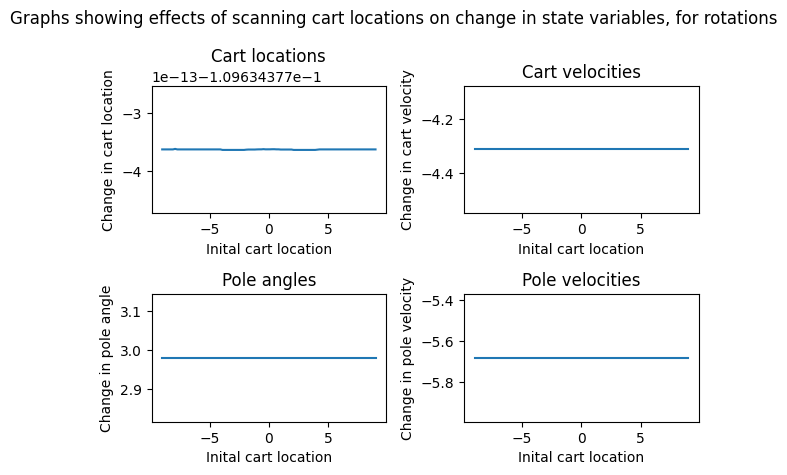

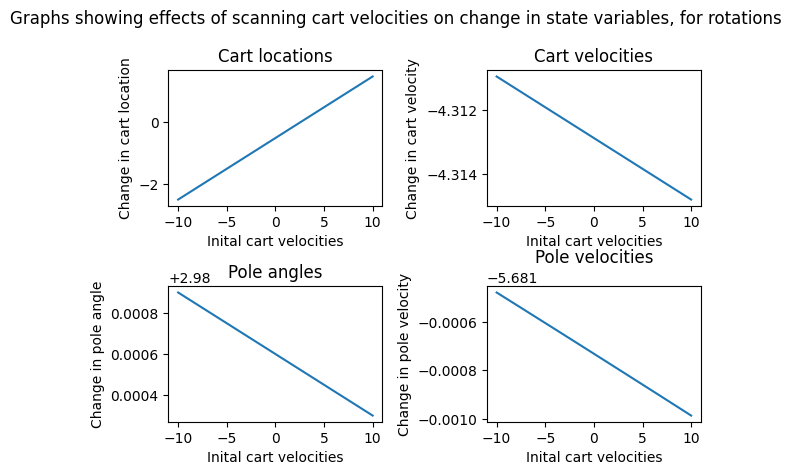

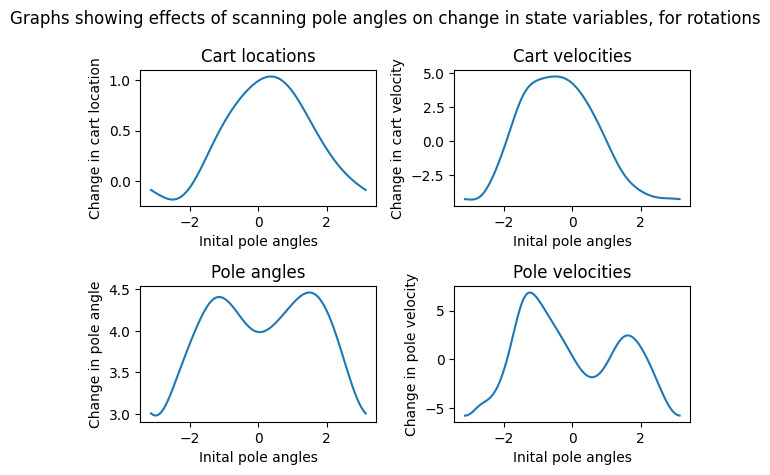

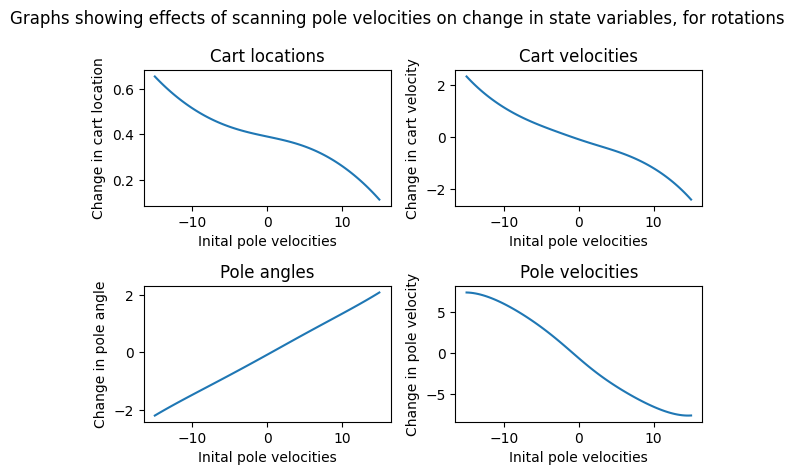

In [6]:

# # # ########### EXERCISE 1.2bi: scans, plotting change in state variables


# X locations to plot
X_cart_locations_to_plot = np.linspace(-9, 9, 100)
X_cart_velocities_to_plot = np.linspace(-10, 10, 100)
X_pole_angles_to_plot = np.linspace(-np.pi, np.pi, 100)
X_pole_velocities_to_plot = np.linspace(-15, 15, 100)


# create instance
pendulum = CartPole()





### when wanting to plot graphs for the case of oscillations or rotations, need to comment out the initial
### condition declerations under each heading "SCAN CART LOCATIONS", "SCAN CART VELOCITIES" etc.

## SCAN CART LOCATIONS

# initialise empty Y locations to plot
Y_cart_locations_to_plot, Y_cart_velocities_to_plot, Y_pole_angles_to_plot, Y_pole_velocities_to_plot = [], [], [], []

# # initialise state variables and state, OSCILLATIONS
# cart_location = 2
# cart_velocity = 2
# pole_angle = np.pi + 0.1 
# pole_velocity = 5
# state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations, ROTATIONS
cart_location = 2
cart_velocity = 2
pole_angle = np.pi + 0.1 
pole_velocity = 20
state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations
for new_location in X_cart_locations_to_plot:
    state[0] = new_location

    # get new state
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()

    # append state variable differences to list
    Y_cart_locations_to_plot.append(new_state[0] - state[0])
    Y_cart_velocities_to_plot.append(new_state[1] - state[1])
    Y_pole_angles_to_plot.append(new_state[2] - state[2])
    Y_pole_velocities_to_plot.append(new_state[3] - state[3])


plt.subplot(2, 2, 1)
plt.plot(X_cart_locations_to_plot, Y_cart_locations_to_plot)
plt.title('Cart locations')
plt.xlabel('Inital cart location')
plt.ylabel('Change in cart location')

plt.subplot(2, 2, 2)
plt.plot(X_cart_locations_to_plot, Y_cart_velocities_to_plot)
plt.title('Cart velocities')
plt.xlabel('Inital cart location')
plt.ylabel('Change in cart velocity')

plt.subplot(2, 2, 3)
plt.plot(X_cart_locations_to_plot, Y_pole_angles_to_plot)
plt.title('Pole angles')
plt.xlabel('Inital cart location')
plt.ylabel('Change in pole angle')

plt.subplot(2, 2, 4)
plt.plot(X_cart_locations_to_plot, Y_pole_velocities_to_plot)
plt.title('Pole velocities')
plt.xlabel('Inital cart location')
plt.ylabel('Change in pole velocity')

plt.suptitle('Graphs showing effects of scanning cart locations on change in state variables, for rotations')
plt.tight_layout()
plt.show()









## SCAN CART VELOCITIES

# initialise empty Y locations to plot
Y_cart_locations_to_plot, Y_cart_velocities_to_plot, Y_pole_angles_to_plot, Y_pole_velocities_to_plot = [], [], [], []

# # initialise state variables and state, OSCILLATIONS
# cart_location = 2
# cart_velocity = 2
# pole_angle = np.pi + 0.1 
# pole_velocity = 5
# state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations, ROTATIONS
cart_location = 2
cart_velocity = 2
pole_angle = np.pi + 0.1 
pole_velocity = 20
state = [cart_location, cart_velocity, pole_angle, pole_velocity]


# scan over cart locations
for new_velocity in X_cart_velocities_to_plot:
    state[1] = new_velocity

    # get new state
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()

    # append state variable differences to list 
    Y_cart_locations_to_plot.append(new_state[0] - state[0])
    Y_cart_velocities_to_plot.append(new_state[1] - state[1])
    Y_pole_angles_to_plot.append(new_state[2] - state[2])
    Y_pole_velocities_to_plot.append(new_state[3] - state[3])


plt.subplot(2, 2, 1)
plt.plot(X_cart_velocities_to_plot, Y_cart_locations_to_plot)
plt.title('Cart locations')
plt.xlabel('Inital cart velocities')
plt.ylabel('Change in cart location')

plt.subplot(2, 2, 2)
plt.plot(X_cart_velocities_to_plot, Y_cart_velocities_to_plot)
plt.title('Cart velocities')
plt.xlabel('Inital cart velocities')
plt.ylabel('Change in cart velocity')

plt.subplot(2, 2, 3)
plt.plot(X_cart_velocities_to_plot, Y_pole_angles_to_plot)
plt.title('Pole angles')
plt.xlabel('Inital cart velocities')
plt.ylabel('Change in pole angle')

plt.subplot(2, 2, 4)
plt.plot(X_cart_velocities_to_plot, Y_pole_velocities_to_plot)
plt.title('Pole velocities')
plt.xlabel('Inital cart velocities')
plt.ylabel('Change in pole velocity')

plt.suptitle('Graphs showing effects of scanning cart velocities on change in state variables, for rotations')
plt.tight_layout()
plt.show()






## SCAN POLE ANGLES

# initialise empty Y locations to plot
Y_cart_locations_to_plot, Y_cart_velocities_to_plot, Y_pole_angles_to_plot, Y_pole_velocities_to_plot = [], [], [], []

# # initialise state variables and state, OSCILLATIONS
# cart_location = 2
# cart_velocity = 2
# pole_angle = np.pi + 0.1 
# pole_velocity = 5
# state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations, ROTATIONS
cart_location = 2
cart_velocity = 2
pole_angle = np.pi + 0.1 
pole_velocity = 20
state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations
for new_angle in X_pole_angles_to_plot:
    state[2] = new_angle

    # get new state
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()

    # append state variable differences to list
    Y_cart_locations_to_plot.append(new_state[0] - state[0])
    Y_cart_velocities_to_plot.append(new_state[1] - state[1])
    Y_pole_angles_to_plot.append(new_state[2] - state[2])
    Y_pole_velocities_to_plot.append(new_state[3] - state[3])


plt.subplot(2, 2, 1)
plt.plot(X_pole_angles_to_plot, Y_cart_locations_to_plot)
plt.title('Cart locations')
plt.xlabel('Inital pole angles')
plt.ylabel('Change in cart location')

plt.subplot(2, 2, 2)
plt.plot(X_pole_angles_to_plot, Y_cart_velocities_to_plot)
plt.title('Cart velocities')
plt.xlabel('Inital pole angles')
plt.ylabel('Change in cart velocity')

plt.subplot(2, 2, 3)
plt.plot(X_pole_angles_to_plot, Y_pole_angles_to_plot)
plt.title('Pole angles')
plt.xlabel('Inital pole angles')
plt.ylabel('Change in pole angle')

plt.subplot(2, 2, 4)
plt.plot(X_pole_angles_to_plot, Y_pole_velocities_to_plot)
plt.title('Pole velocities')
plt.xlabel('Inital pole angles')
plt.ylabel('Change in pole velocity')

plt.suptitle('Graphs showing effects of scanning pole angles on change in state variables, for rotations')
plt.tight_layout()
plt.show()





## SCAN POLE VELOCITIES

# initialise empty Y locations to plot
Y_cart_locations_to_plot, Y_cart_velocities_to_plot, Y_pole_angles_to_plot, Y_pole_velocities_to_plot = [], [], [], []

# # initialise state variables and state, OSCILLATIONS
# cart_location = 2
# cart_velocity = 2
# pole_angle = np.pi + 0.1 
# pole_velocity = 5
# state = [cart_location, cart_velocity, pole_angle, pole_velocity]

# scan over cart locations, ROTATIONS
cart_location = 2
cart_velocity = 2
pole_angle = np.pi + 0.1 
pole_velocity = 20
state = [cart_location, cart_velocity, pole_angle, pole_velocity]


# scan over cart locations
for new_velocity in X_pole_velocities_to_plot:
    state[3] = new_velocity

    # get new state
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()

    # append state variable differences to list
    Y_cart_locations_to_plot.append(new_state[0] - state[0])
    Y_cart_velocities_to_plot.append(new_state[1] - state[1])
    Y_pole_angles_to_plot.append(new_state[2] - state[2])
    Y_pole_velocities_to_plot.append(new_state[3] - state[3])


plt.subplot(2, 2, 1)
plt.plot(X_pole_velocities_to_plot, Y_cart_locations_to_plot)
plt.title('Cart locations')
plt.xlabel('Inital pole velocities')
plt.ylabel('Change in cart location')

plt.subplot(2, 2, 2)
plt.plot(X_pole_velocities_to_plot, Y_cart_velocities_to_plot)
plt.title('Cart velocities')
plt.xlabel('Inital pole velocities')
plt.ylabel('Change in cart velocity')

plt.subplot(2, 2, 3)
plt.plot(X_pole_velocities_to_plot, Y_pole_angles_to_plot)
plt.title('Pole angles')
plt.xlabel('Inital pole velocities')
plt.ylabel('Change in pole angle')

plt.subplot(2, 2, 4)
plt.plot(X_pole_velocities_to_plot, Y_pole_velocities_to_plot)
plt.title('Pole velocities')
plt.xlabel('Inital pole velocities')
plt.ylabel('Change in pole velocity')

plt.suptitle('Graphs showing effects of scanning pole velocities on change in state variables, for rotations')
plt.tight_layout()
plt.show()


### need to plot graphs for different initial states, as per in 2a, probably complete roations



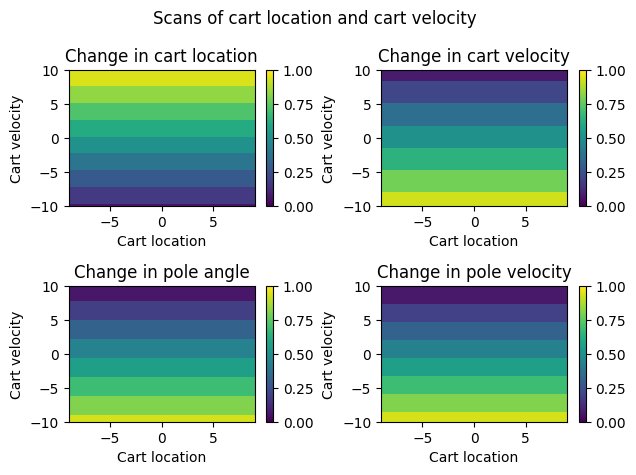

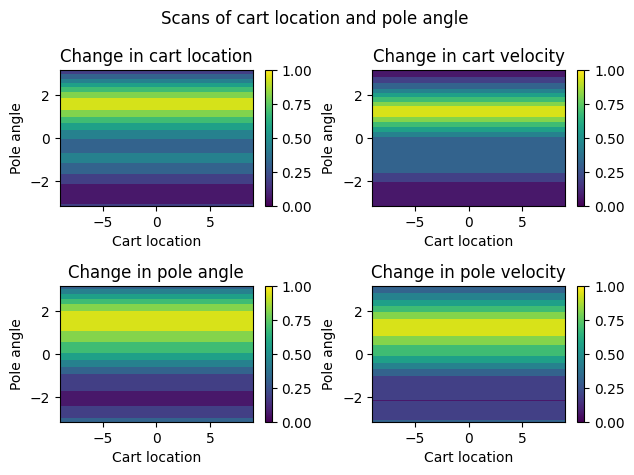

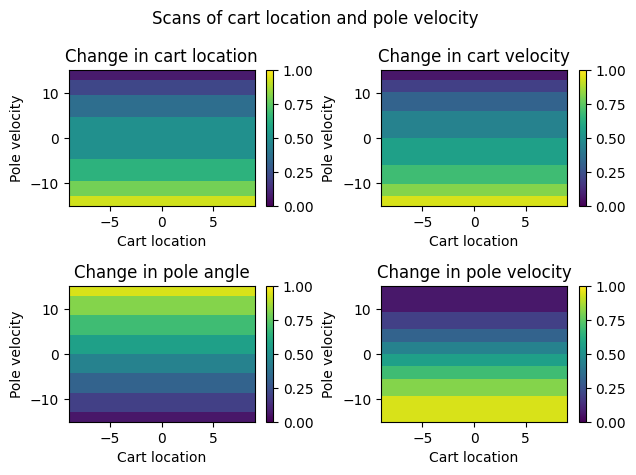

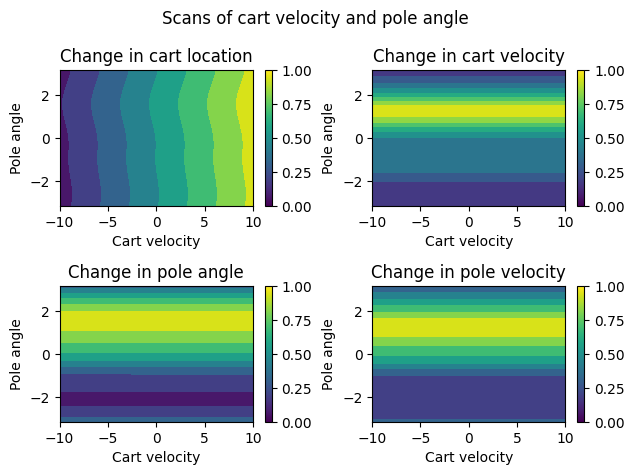

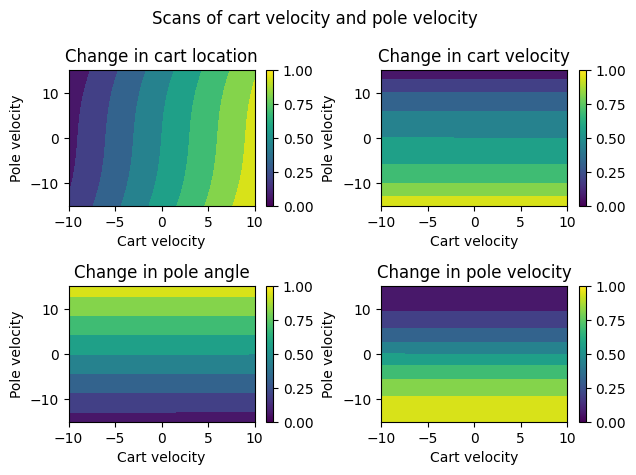

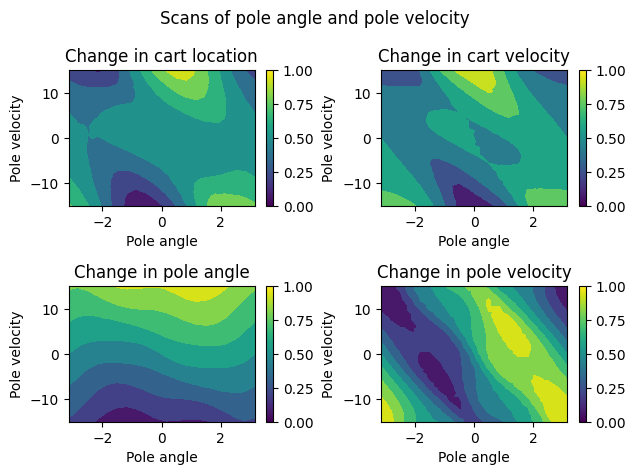

In [7]:
# ############## EXERCISE 1.2bii: contour plots

### FUNCTION TO DO CONTOUR PLOTS
# function to plot 2D scans of state variables using non-linear model with action
def plot_2D_scans_according_to_simulation(constant_state, no_increments=20):

    # create instance of CartPole
    pendulum = CartPole()

    # initialise lists corresponding to state variables to scan over: cart.loc = 9, cart.vel = 10, pole.angle = pi, pole.vel = 15
    list_of_ranges = [[9, 10], [9, np.pi], [9, 15], [10, np.pi], [10, 15], [np.pi, 15]]

    # create lists of x and y labels and suptitles
    x_labels = ["Cart location", "Cart location", "Cart location", "Cart velocity", "Cart velocity", "Pole angle"]
    y_labels = ["Cart velocity", "Pole angle", "Pole velocity", "Pole angle", "Pole velocity", "Pole velocity"]
    suptitles = ["Scans of cart location and cart velocity", "Scans of cart location and pole angle", "Scans of cart location and pole velocity", "Scans of cart velocity and pole angle", "Scans of cart velocity and pole velocity", "Scans of pole angle and pole velocity"]

    # initialise constant state variables
    constant_cart_location = constant_state[0]
    constant_cart_velocity = constant_state[1]
    constant_pole_angle = constant_state[2]
    constant_pole_velocity = constant_state[3]

    # looking over 10 different combinations of state variables
    for index_of_state_variables_we_scan_over in range(0, 6):

        # get array of values to test in our scan
        x = list_of_ranges[index_of_state_variables_we_scan_over][0]
        y = list_of_ranges[index_of_state_variables_we_scan_over][1]
        array_of_values_of_variable_to_scan_x = np.linspace(-x, x, no_increments)
        array_of_values_of_variable_to_scan_y = np.linspace(-y, y, no_increments)

        # initialise state vector
        state = [constant_cart_location, constant_cart_velocity, constant_pole_angle, constant_pole_velocity]

        # initialise empty lists into which predicted Y values will go
        pred_Y_cart_locations_to_plot = []
        pred_Y_cart_velocities_to_plot = []
        pred_Y_pole_angles_to_plot = []
        pred_Y_pole_velocities_to_plot = []

        # TRY THIS
        array_of_values_of_variable_to_scan_x, array_of_values_of_variable_to_scan_y = np.meshgrid(array_of_values_of_variable_to_scan_x, array_of_values_of_variable_to_scan_y)
        array_of_values_of_variable_to_scan_x = array_of_values_of_variable_to_scan_x.flatten()
        array_of_values_of_variable_to_scan_y = array_of_values_of_variable_to_scan_y.flatten()
        triangulation = tri.Triangulation(array_of_values_of_variable_to_scan_x, array_of_values_of_variable_to_scan_y)

        # loop over values the variable which is being scanned takes
        # for i in range(0, no_increments): GOT RID OF THIS BC TRYING A THING OUT
        for i, (xi, yi) in enumerate(zip(array_of_values_of_variable_to_scan_x, array_of_values_of_variable_to_scan_y)):

            # update state vector
            if index_of_state_variables_we_scan_over == 0: # scanning over cart location and cart velocity
                state[0] = array_of_values_of_variable_to_scan_x[i]
                state[1] = array_of_values_of_variable_to_scan_y[i]
            
            elif index_of_state_variables_we_scan_over == 1: # scanning over cart location and pole angle
                state[0] = array_of_values_of_variable_to_scan_x[i]
                state[2] = array_of_values_of_variable_to_scan_y[i]
            
            elif index_of_state_variables_we_scan_over == 2: # scanning over cart location and pole velocity
                state[0] = array_of_values_of_variable_to_scan_x[i]
                state[3] = array_of_values_of_variable_to_scan_y[i]
            
            elif index_of_state_variables_we_scan_over == 3: # scanning over cart velocity and pole angle
                state[1] = array_of_values_of_variable_to_scan_x[i]
                state[2] = array_of_values_of_variable_to_scan_y[i]
            
            elif index_of_state_variables_we_scan_over == 4: # scanning over cart velocity and pole velocity
                state[1] = array_of_values_of_variable_to_scan_x[i]
                state[3] = array_of_values_of_variable_to_scan_y[i]
            
            elif index_of_state_variables_we_scan_over == 5: # scanning over pole angle and pole velocity
                state[2] = array_of_values_of_variable_to_scan_x[i]
                state[3] = array_of_values_of_variable_to_scan_y[i]
            
            else:
                print("error")
            
            
            # get Y according to simulation
            pendulum.setState(state)
            pendulum.performAction()
            Y = pendulum.getState() - state # to get change in state

            # append predicted Y values to lists
            pred_Y_cart_locations_to_plot.append(Y[0])
            pred_Y_cart_velocities_to_plot.append(Y[1])
            pred_Y_pole_angles_to_plot.append(Y[2])
            pred_Y_pole_velocities_to_plot.append(Y[3])


        ## Plot the filled contour

        # Create subplots
        fig, axs = plt.subplots(2, 2)

        # plot cart locations
        axs[0, 0].tricontourf(triangulation, pred_Y_cart_locations_to_plot)
        axs[0, 0].set_xlabel(x_labels[index_of_state_variables_we_scan_over])
        axs[0, 0].set_ylabel(y_labels[index_of_state_variables_we_scan_over])
        axs[0, 0].set_title('Change in cart location')
        fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])

        # plot cart velocities
        axs[0, 1].tricontourf(triangulation, pred_Y_cart_velocities_to_plot)
        axs[0, 1].set_xlabel(x_labels[index_of_state_variables_we_scan_over])
        axs[0, 1].set_ylabel(y_labels[index_of_state_variables_we_scan_over])
        axs[0, 1].set_title('Change in cart velocity')
        fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])

        # plot pole angles
        axs[1, 0].tricontourf(triangulation, pred_Y_pole_angles_to_plot)
        axs[1, 0].set_xlabel(x_labels[index_of_state_variables_we_scan_over])
        axs[1, 0].set_ylabel(y_labels[index_of_state_variables_we_scan_over])
        axs[1, 0].set_title('Change in pole angle')
        fig.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])

        # plot pole velocities
        axs[1, 1].tricontourf(triangulation, pred_Y_pole_velocities_to_plot)
        axs[1, 1].set_xlabel(x_labels[index_of_state_variables_we_scan_over])
        axs[1, 1].set_ylabel(y_labels[index_of_state_variables_we_scan_over])
        axs[1, 1].set_title('Change in pole velocity')
        fig.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])

        fig.suptitle(suptitles[index_of_state_variables_we_scan_over])
        fig.tight_layout()
        plt.show()

constant_state = [0, 1, np.pi, 5] # oscillations
plot_2D_scans_according_to_simulation(constant_state)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=041cc40d-98d2-497a-9cd8-50c462813389' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

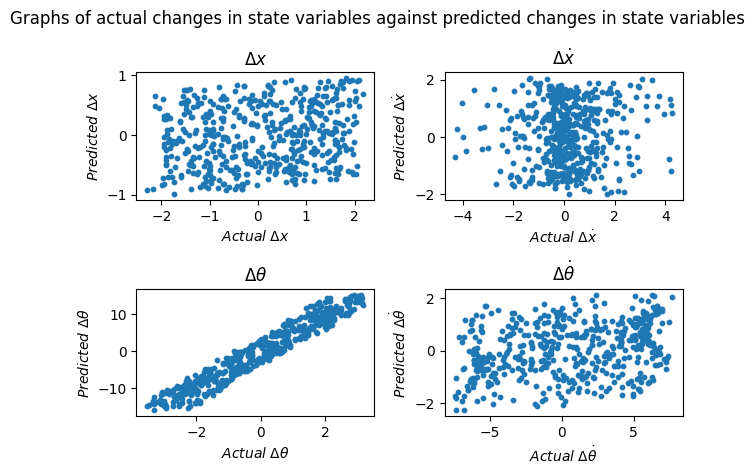

In [7]:
###### EXERCISE 1.3

 
# function to return list of tuples of (X, Y) where X is a random state vector and Y = X(n+1) - X(n)
def make_random_X_Y_tuples(no_datapoints):

    # initialise emtpy list into which (X,Y) tuples will go
    list_of_X_Y_tuples = []

    # initialise instance of CartPole
    pendulum = CartPole()

    # make no_datapoints number of (X,Y) tuples
    for i in range(no_datapoints):

        # initialise random state
        cart_location = np.random.uniform(-9, 9)
        cart_velocity = np.random.uniform(-10, 10)
        pole_angle = np.random.uniform(-np.pi, np.pi)
        pole_velocity = np.random.uniform(-15, 15)
        state = np.array((cart_location, cart_velocity, pole_angle, pole_velocity))

        # update state and run one iteration to get new state
        pendulum.setState(state)
        pendulum.performAction()
        new_state = pendulum.getState()

        # make (X, Y) tuple
        Y = new_state - state
        list_of_X_Y_tuples.append((state, Y))
    
    return list_of_X_Y_tuples



# function to generate the OLS matrix given a list of (X,Y) datapoints
def find_OLS_matrix2(list_of_X_Y_tuples):

    # initiate empty X and Y matrices where each row will contain each X, Y datapoint
    X = np.zeros((len(list_of_X_Y_tuples), 4))
    Y = np.zeros((len(list_of_X_Y_tuples), 4))

    # populate X and Y matrices' rows with datapoints
    for i in range(len(list_of_X_Y_tuples)):
        X[i] = list_of_X_Y_tuples[i][0]
        Y[i] = list_of_X_Y_tuples[i][1]
    
    # find OLS matrix so solve the equation: Y=CX
    C = np.linalg.lstsq(X, Y, rcond=None)[0]

    return C




# function to plot graph of input X state variable against prediction and real Y state variable, given list of X,Y tuples, optimal matrix and index of variable to plot
def plot_X_against_predY_realY(list_of_X_Y_tuples, C, index):

    # initialise empty lists into which values to plot will go
    X_vals_to_plot = []
    Y_predict_vals_to_plot = []
    Y_actual_vals_to_plot = []

    # iterate over list of X,Y tuples and populate lists of real values to plot
    for XY_tuple in list_of_X_Y_tuples:
        X = XY_tuple[0]
        Y = XY_tuple[1]
        X_vals_to_plot.append(X[index])
        Y_actual_vals_to_plot.append(Y[index])

        # find predicted Y
        Y_predict_vector = np.matmul(C, X)
        Y_predict_vals_to_plot.append(Y_predict_vector[index])
    
    # plot graphs
    plt.scatter(X_vals_to_plot, Y_actual_vals_to_plot, label="actual Y")
    plt.scatter(X_vals_to_plot, Y_predict_vals_to_plot, label="predicted Y", color='red')
    plt.legend()
    plt.show()





# function to plot a graph of real next step against predicted next step
def plot_realY_against_predY(list_of_X_Y_tuples, C):

    # initialise empty lists into which values to plot will go
    actual_Y_x_to_plot = []
    actual_Y_xdot_to_plot = []
    actual_Y_theta_to_plot = []
    actual_Y_thetadot_to_plot = []
    pred_Y_x_to_plot = []
    pred_Y_xdot_to_plot = []
    pred_Y_theta_to_plot = []
    pred_Y_thetadot_to_plot = []


    # iterate over list of X,Y tuples and populate lists of real values to plot
    for XY_tuple in list_of_X_Y_tuples:

        # get current X and Y state vectors
        X = XY_tuple[0]
        Y = XY_tuple[1]

        # populate lists to plot
        actual_Y_x_to_plot.append(Y[0])
        actual_Y_xdot_to_plot.append(Y[1])
        actual_Y_theta_to_plot.append(Y[2])
        actual_Y_thetadot_to_plot.append(Y[3])


        # find predicted Y
        Y_predict_vector = np.matmul(C, X)

        # populate lists to plot
        pred_Y_x_to_plot.append(Y_predict_vector[0])
        pred_Y_xdot_to_plot.append(Y_predict_vector[1])
        pred_Y_theta_to_plot.append(Y_predict_vector[2])
        pred_Y_thetadot_to_plot.append(Y_predict_vector[3])
    

    
    # plot graphs
    plt.subplot(2, 2, 1)
    plt.scatter(actual_Y_x_to_plot, pred_Y_x_to_plot, s=10)
    plt.title(r'$\Delta x$')
    plt.xlabel(r'$Actual\ \Delta x$')
    plt.ylabel(r'$Predicted\ \Delta x$')

    plt.subplot(2, 2, 2)
    plt.scatter(actual_Y_xdot_to_plot, pred_Y_xdot_to_plot, s=10)
    plt.title(r'$\Delta \dot{x}$')
    plt.xlabel(r'$Actual\ \Delta \dot{x}$')
    plt.ylabel(r'$Predicted\ \Delta \dot{x}$')

    plt.subplot(2, 2, 3)
    plt.scatter(actual_Y_theta_to_plot, pred_Y_theta_to_plot, s=10)
    plt.title(r'$\Delta \theta$')
    plt.xlabel(r'$Actual\ \Delta \theta$')
    plt.ylabel(r'$Predicted\ \Delta \theta$')

    plt.subplot(2, 2, 4)
    plt.scatter(actual_Y_thetadot_to_plot, pred_Y_thetadot_to_plot, s=10)
    plt.title(r'$\Delta \dot{\theta}$')
    plt.xlabel(r'$Actual\ \Delta \dot{\theta}$')
    plt.ylabel(r'$Predicted\ \Delta \dot{\theta}$')
    
    plt.suptitle('Graphs of actual changes in state variables against predicted changes in state variables')
    plt.tight_layout()
    plt.show() 
        

no_datapoints = 500

list_of_X_Y_tuples = make_random_X_Y_tuples(no_datapoints)
optimal_matrix = find_OLS_matrix2(list_of_X_Y_tuples)

plot_realY_against_predY(list_of_X_Y_tuples, optimal_matrix)

# print(optimal_matrix)


In [23]:
######### EXERCISE 1.3 scans

# initialise random state variables
cart_location = np.random.uniform(-9, 9)
cart_velocity = np.random.uniform(-10, 10)
pole_angle = np.random.uniform(-np.pi, np.pi)
pole_velocity = np.random.uniform(-15, 15)
state = [cart_location, cart_velocity, pole_angle, pole_velocity]


# X locations to plot
X_cart_locations_to_plot = np.linspace(-9, 9, 100)
X_cart_velocities_to_plot = np.linspace(-10, 10, 100)
X_pole_angles_to_plot = np.linspace(-np.pi, np.pi, 100)
X_pole_velocities_to_plot = np.linspace(-15, 15, 100)

# initialise empty Y locations to plot
Y_actual_cart_locations_to_plot = []
Y_actual_cart_velocities_to_plot = []
Y_actual_pole_angles_to_plot = []
Y_actual_pole_velocities_to_plot = []

# create instance
pendulum = CartPole()


## test cart locations

# iterate over each cart location to plot and adjust state
for new_location in X_cart_locations_to_plot:

    # update location
    state[0] = new_location

    # get and append actual new state to list
    pendulum.setState(state)
    pendulum.performAction()
    actual_new_state = pendulum.getState()
    Y_actual_cart_locations_to_plot.append(actual_new_state[0])

    # get and append predicted new state to list
    


#find predicted cart locations



# iterate over each cart location to plot and adjust state
for new_location in X_cart_locations_to_plot:

    # update location
    state[0] = new_location

    # get and append new state to list
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()
    Y_actual_cart_locations_to_plot.append(new_state[0])

# iterate over each cart location to plot and adjust state
for new_location in X_cart_locations_to_plot:

    # update location
    state[0] = new_location

    # get and append new state to list
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()
    Y_actual_cart_locations_to_plot.append(new_state[0])

# iterate over each cart location to plot and adjust state
for new_location in X_cart_locations_to_plot:

    # update location
    state[0] = new_location

    # get and append new state to list
    pendulum.setState(state)
    pendulum.performAction()
    new_state = pendulum.getState()
    Y_actual_cart_locations_to_plot.append(new_state[0])
    

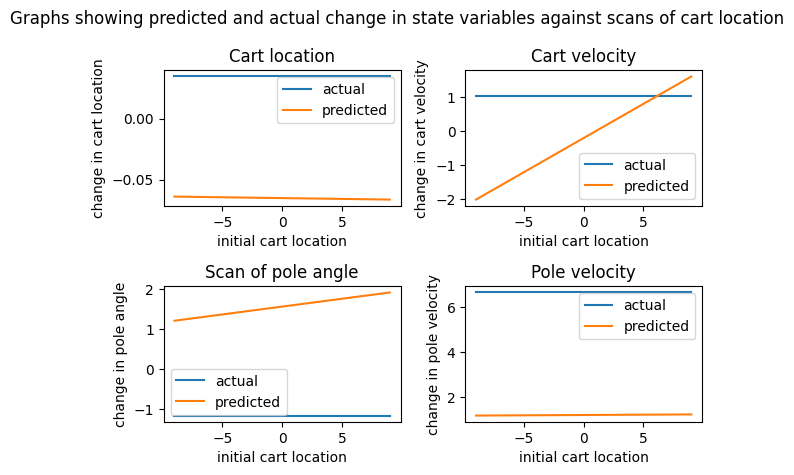

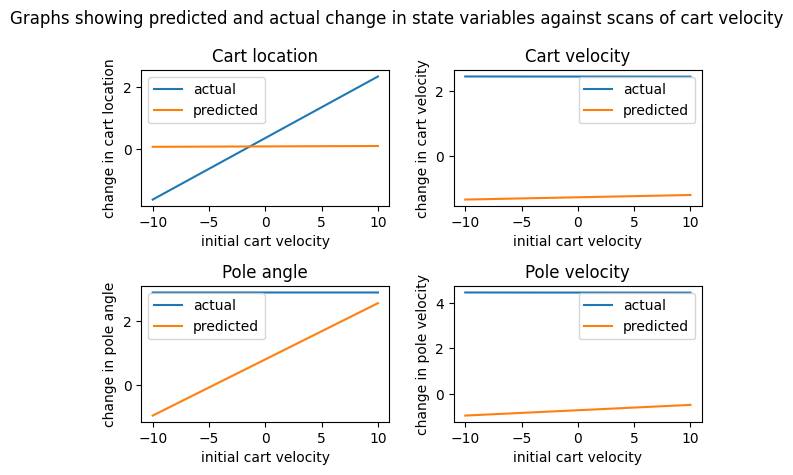

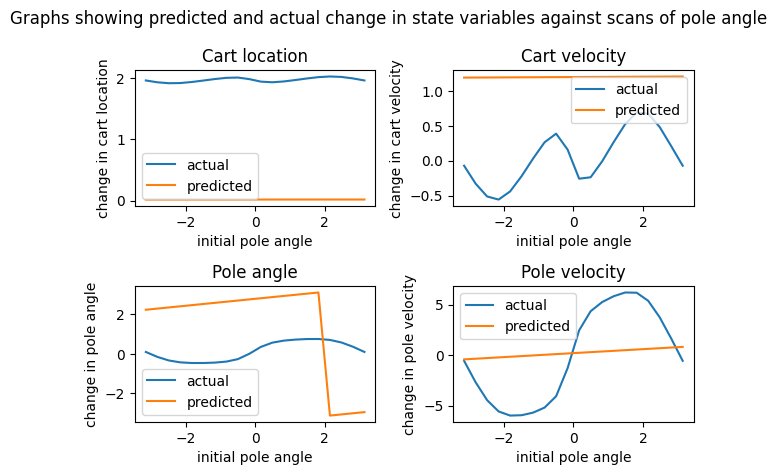

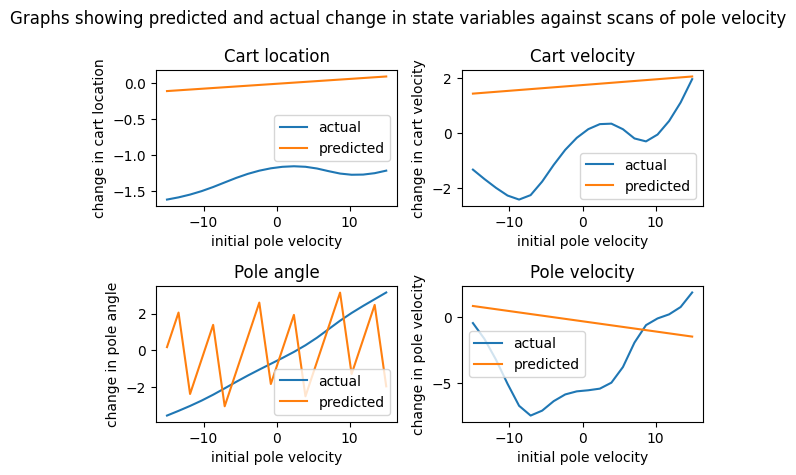

In [28]:
######## EXERCISE 1.3 SCANS 

# make function to plot 4 graphs: each one is a scan of X[i] against the actual value of Y[i] and the predicted Y[i]
def plot_scan_predY_realY(C):

    # create instance of cartpole
    pendulum = CartPole()


    ## scan of x


    # initialise random state variables
    cart_velocity = np.random.uniform(-10, 10)
    pole_angle = np.random.uniform(-np.pi, np.pi)
    pole_velocity = np.random.uniform(-15, 15)
    X_cart_locations_to_plot = np.linspace(-9, 9, 20)

    # initialise empty Y state variables to plot
    actual_Y_cart_locations_to_plot = []
    pred_Y_cart_locations_to_plot = []
    actual_Y_cart_velocities_to_plot = []
    pred_Y_cart_velocities_to_plot = []
    actual_Y_pole_angles_to_plot = []
    pred_Y_pole_angles_to_plot = []
    actual_Y_pole_velocities_to_plot = []
    pred_Y_pole_velocities_to_plot = []

    # scan over cart locations
    for cart_location in X_cart_locations_to_plot:

        # set state vector with new cart location
        state = [cart_location, cart_velocity, pole_angle, pole_velocity]
        
        # get actual Y
        pendulum.setState(state)
        pendulum.performAction()
        new_state = pendulum.getState()
        Y = new_state - state

        # append actual state variables to lists
        actual_Y_cart_locations_to_plot.append(Y[0])
        actual_Y_cart_velocities_to_plot.append(Y[1])
        actual_Y_pole_angles_to_plot.append(Y[2])
        actual_Y_pole_velocities_to_plot.append(Y[3])
    

        # get predicted Y
        pred_Y = np.matmul(C, state)
        pred_Y[2] = _remap_angle(pred_Y[2]) # remap angle

        # append predicted state variables to lists
        pred_Y_cart_locations_to_plot.append(pred_Y[0])
        pred_Y_cart_velocities_to_plot.append(pred_Y[1])
        pred_Y_pole_angles_to_plot.append(pred_Y[2])
        pred_Y_pole_velocities_to_plot.append(pred_Y[3])
    

    # plot actual and predicted Y against X
    plt.subplot(2, 2, 1)
    plt.plot(X_cart_locations_to_plot, actual_Y_cart_locations_to_plot, label='actual')
    plt.plot(X_cart_locations_to_plot, pred_Y_cart_locations_to_plot, label='predicted')
    plt.xlabel('initial cart location')
    plt.ylabel('change in cart location')
    plt.legend()
    plt.title('Cart location')

    plt.subplot(2, 2, 2)
    plt.plot(X_cart_locations_to_plot, actual_Y_cart_velocities_to_plot, label='actual')
    plt.plot(X_cart_locations_to_plot, pred_Y_cart_velocities_to_plot, label='predicted')
    plt.xlabel('initial cart location')
    plt.ylabel('change in cart velocity')
    plt.legend()
    plt.title('Cart velocity')

    plt.subplot(2, 2, 3)
    plt.plot(X_cart_locations_to_plot, actual_Y_pole_angles_to_plot, label='actual')
    plt.plot(X_cart_locations_to_plot, pred_Y_pole_angles_to_plot, label='predicted')
    plt.xlabel('initial cart location')
    plt.ylabel('change in pole angle')
    plt.legend()
    plt.title('Scan of pole angle')

    plt.subplot(2, 2, 4)
    plt.plot(X_cart_locations_to_plot, actual_Y_pole_velocities_to_plot, label='actual')
    plt.plot(X_cart_locations_to_plot, pred_Y_pole_velocities_to_plot, label='predicted')
    plt.xlabel('initial cart location')
    plt.ylabel('change in pole velocity')
    plt.legend()
    plt.title('Pole velocity')


    plt.suptitle('Graphs showing predicted and actual change in state variables against scans of cart location')
    plt.tight_layout()
    plt.show()


    


    ## scan of xdot
    
    cart_location = np.random.uniform(-9, 9)
    pole_angle = np.random.uniform(-np.pi, np.pi)
    pole_velocity = np.random.uniform(-15, 15)
    X_cart_velocities_to_plot = np.linspace(-10, 10, 20)

    actual_Y_cart_locations_to_plot = []
    pred_Y_cart_locations_to_plot = []
    actual_Y_cart_velocities_to_plot = []
    pred_Y_cart_velocities_to_plot = []
    actual_Y_pole_angles_to_plot = []
    pred_Y_pole_angles_to_plot = []
    actual_Y_pole_velocities_to_plot = []
    pred_Y_pole_velocities_to_plot = []
    

    # scan over cart velocities
    for cart_velocity in X_cart_velocities_to_plot:

        # set state vector with new cart velocities
        state = [cart_location, cart_velocity, pole_angle, pole_velocity]
        
        # get actual Y
        pendulum.setState(state)
        pendulum.performAction()
        new_state = pendulum.getState()
        Y = new_state - state

        # append actual state variables to lists
        actual_Y_cart_locations_to_plot.append(Y[0])
        actual_Y_cart_velocities_to_plot.append(Y[1])
        actual_Y_pole_angles_to_plot.append(Y[2])
        actual_Y_pole_velocities_to_plot.append(Y[3])

        # get and predicted Y
        pred_Y = np.matmul(C, state)
        pred_Y[2] = _remap_angle(pred_Y[2]) # remap angle

        # append predicted state variables to lists
        pred_Y_cart_locations_to_plot.append(pred_Y[0])
        pred_Y_cart_velocities_to_plot.append(pred_Y[1])
        pred_Y_pole_angles_to_plot.append(pred_Y[2])
        pred_Y_pole_velocities_to_plot.append(pred_Y[3])

    # plot actual and predicted Y against X
    plt.subplot(2, 2, 1)
    plt.plot(X_cart_velocities_to_plot, actual_Y_cart_locations_to_plot, label='actual')
    plt.plot(X_cart_velocities_to_plot, pred_Y_cart_locations_to_plot, label='predicted')
    plt.xlabel('initial cart velocity')
    plt.ylabel('change in cart location')
    plt.legend()
    plt.title('Cart location')

    plt.subplot(2, 2, 2)
    plt.plot(X_cart_velocities_to_plot, actual_Y_cart_velocities_to_plot, label='actual')
    plt.plot(X_cart_velocities_to_plot, pred_Y_cart_velocities_to_plot, label='predicted')
    plt.xlabel('initial cart velocity')
    plt.ylabel('change in cart velocity')
    plt.legend()
    plt.title('Cart velocity')

    plt.subplot(2, 2, 3)
    plt.plot(X_cart_velocities_to_plot, actual_Y_pole_angles_to_plot, label='actual')
    plt.plot(X_cart_velocities_to_plot, pred_Y_pole_angles_to_plot, label='predicted')
    plt.xlabel('initial cart velocity')
    plt.ylabel('change in pole angle')
    plt.legend()
    plt.title('Pole angle')

    plt.subplot(2, 2, 4)
    plt.plot(X_cart_velocities_to_plot, actual_Y_pole_velocities_to_plot, label='actual')
    plt.plot(X_cart_velocities_to_plot, pred_Y_pole_velocities_to_plot, label='predicted')
    plt.xlabel('initial cart velocity')
    plt.ylabel('change in pole velocity')
    plt.legend()
    plt.title('Pole velocity')

    plt.suptitle('Graphs showing predicted and actual change in state variables against scans of cart velocity')
    plt.tight_layout()
    plt.show()


    ## scan of theta
    
    cart_location = np.random.uniform(-9, 9)
    cart_velocity = np.random.uniform(-10, 10)
    pole_velocity = np.random.uniform(-15, 15)
    X_pole_angles_to_plot = np.linspace(-np.pi, np.pi, 20)

    actual_Y_cart_locations_to_plot = []
    pred_Y_cart_locations_to_plot = []
    actual_Y_cart_velocities_to_plot = []
    pred_Y_cart_velocities_to_plot = []
    actual_Y_pole_angles_to_plot = []
    pred_Y_pole_angles_to_plot = []
    actual_Y_pole_velocities_to_plot = []
    pred_Y_pole_velocities_to_plot = []


    # scan over pole angles
    for pole_angle in X_pole_angles_to_plot:

        # set state vector with new pole angle
        state = [cart_location, cart_velocity, pole_angle, pole_velocity]
        
        # get actual Y
        pendulum.setState(state)
        pendulum.performAction()
        new_state = pendulum.getState()
        Y = new_state - state

        # append actual state variables to lists
        actual_Y_cart_locations_to_plot.append(Y[0])
        actual_Y_cart_velocities_to_plot.append(Y[1])
        actual_Y_pole_angles_to_plot.append(Y[2])
        actual_Y_pole_velocities_to_plot.append(Y[3])

        # get predicted Y
        pred_Y = np.matmul(C, state)
        pred_Y[2] = _remap_angle(pred_Y[2]) # remap angle

        # append predicted state variables to lists
        pred_Y_cart_locations_to_plot.append(pred_Y[0])
        pred_Y_cart_velocities_to_plot.append(pred_Y[1])
        pred_Y_pole_angles_to_plot.append(pred_Y[2])
        pred_Y_pole_velocities_to_plot.append(pred_Y[3])

    # plot actual and predicted Y against X
    plt.subplot(2, 2, 1)
    plt.plot(X_pole_angles_to_plot, actual_Y_cart_locations_to_plot, label='actual')
    plt.plot(X_pole_angles_to_plot, pred_Y_cart_locations_to_plot, label='predicted')
    plt.xlabel('initial pole angle')
    plt.ylabel('change in cart location')
    plt.legend()
    plt.title('Cart location')

    plt.subplot(2, 2, 2)
    plt.plot(X_pole_angles_to_plot, actual_Y_cart_velocities_to_plot, label='actual')
    plt.plot(X_pole_angles_to_plot, pred_Y_cart_velocities_to_plot, label='predicted')
    plt.xlabel('initial pole angle')
    plt.ylabel('change in cart velocity')
    plt.legend()
    plt.title('Cart velocity')

    plt.subplot(2, 2, 3)
    plt.plot(X_pole_angles_to_plot, actual_Y_pole_angles_to_plot, label='actual')
    plt.plot(X_pole_angles_to_plot, pred_Y_pole_angles_to_plot, label='predicted')
    plt.xlabel('initial pole angle')
    plt.ylabel('change in pole angle')
    plt.legend()
    plt.title('Pole angle')

    plt.subplot(2, 2, 4)
    plt.plot(X_pole_angles_to_plot, actual_Y_pole_velocities_to_plot, label='actual')

    plt.plot(X_pole_angles_to_plot, pred_Y_pole_velocities_to_plot, label='predicted')
    plt.xlabel('initial pole angle')
    plt.ylabel('change in pole velocity')
    plt.legend()
    plt.title('Pole velocity')

    plt.suptitle('Graphs showing predicted and actual change in state variables against scans of pole angle')
    plt.tight_layout()
    plt.show()




    ## scan of thetadot
    
    cart_location = np.random.uniform(-9, 9)
    cart_velocity = np.random.uniform(-10, 10)
    pole_angle = np.random.uniform(-np.pi, np.pi)
    X_pole_velocities_to_plot = np.linspace(-15, 15, 20)

    actual_Y_cart_locations_to_plot = []
    pred_Y_cart_locations_to_plot = []
    actual_Y_cart_velocities_to_plot = []
    pred_Y_cart_velocities_to_plot = []
    actual_Y_pole_angles_to_plot = []
    pred_Y_pole_angles_to_plot = []
    actual_Y_pole_velocities_to_plot = []
    pred_Y_pole_velocities_to_plot = []

    # scan over cart locations
    for pole_velocity in X_pole_velocities_to_plot:

        # set state vector with new pole velocity
        state = [cart_location, cart_velocity, pole_angle, pole_velocity]
        
        # get actual Y
        pendulum.setState(state)
        pendulum.performAction()
        new_state = pendulum.getState()
        Y = new_state - state

        # append actual state variables to lists
        actual_Y_cart_locations_to_plot.append(Y[0])
        actual_Y_cart_velocities_to_plot.append(Y[1])
        actual_Y_pole_angles_to_plot.append(Y[2])
        actual_Y_pole_velocities_to_plot.append(Y[3])

        # get predicted Y
        pred_Y = np.matmul(C, state)
        pred_Y[2] = _remap_angle(pred_Y[2]) # remap angle

        # append predicted state variables to lists
        pred_Y_cart_locations_to_plot.append(pred_Y[0])
        pred_Y_cart_velocities_to_plot.append(pred_Y[1])
        pred_Y_pole_angles_to_plot.append(pred_Y[2])
        pred_Y_pole_velocities_to_plot.append(pred_Y[3])



    ## plot graphs

    # plot actual and predicted Y against X
    plt.subplot(2, 2, 1)
    plt.plot(X_pole_velocities_to_plot, actual_Y_cart_locations_to_plot, label='actual')
    plt.plot(X_pole_velocities_to_plot, pred_Y_cart_locations_to_plot, label='predicted')
    plt.xlabel('initial pole velocity')
    plt.ylabel('change in cart location')
    plt.legend()
    plt.title('Cart location')

    plt.subplot(2, 2, 2)
    plt.plot(X_pole_velocities_to_plot, actual_Y_cart_velocities_to_plot, label='actual')
    plt.plot(X_pole_velocities_to_plot, pred_Y_cart_velocities_to_plot, label='predicted')
    plt.xlabel('initial pole velocity')
    plt.ylabel('change in cart velocity')
    plt.legend()
    plt.title('Cart velocity')

    plt.subplot(2, 2, 3)
    plt.plot(X_pole_velocities_to_plot, actual_Y_pole_angles_to_plot, label='actual')
    plt.plot(X_pole_velocities_to_plot, pred_Y_pole_angles_to_plot, label='predicted')
    plt.xlabel('initial pole velocity')
    plt.ylabel('change in pole angle')
    plt.legend()
    plt.title('Pole angle')

    plt.subplot(2, 2, 4)
    plt.plot(X_pole_velocities_to_plot, actual_Y_pole_velocities_to_plot, label='actual')
    plt.plot(X_pole_velocities_to_plot, pred_Y_pole_velocities_to_plot, label='predicted')
    plt.xlabel('initial pole velocity')
    plt.ylabel('change in pole velocity')
    plt.legend()
    plt.title('Pole velocity')

    plt.suptitle('Graphs showing predicted and actual change in state variables against scans of pole velocity')
    plt.tight_layout()
    plt.show()




# get optimal matrix
no_datapoints = 5000
list_of_X_Y_tuples = make_random_X_Y_tuples(no_datapoints)
C = find_OLS_matrix2(list_of_X_Y_tuples)

plot_scan_predY_realY(C)



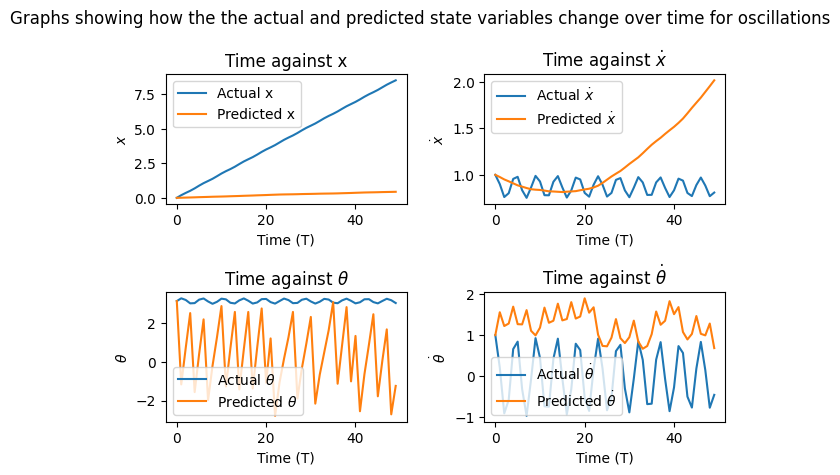

In [ ]:
######### EXERCISE 1.4

# function that plots graphs for how each state variable changes over time, both the actual values and the 
# predicted values, given initial state vector X, optimal matrix C and number of iterations no_its
def plot_real_and_model_over_time(X, C, no_its):


    # initialise lists into which values to plot will go, with starting point added
    x_to_plot_actual, xdot_to_plot_actual, theta_to_plot_actual, thetadot_to_plot_actual = [X[0]], [X[1]], [X[2]], [X[3]]
    x_to_plot_pred, xdot_to_plot_pred, theta_to_plot_pred, thetadot_to_plot_pred = [X[0]], [X[1]], [X[2]], [X[3]]

    # create array for time
    time_to_plot = np.arange(no_its)


    # make instance of cartpole
    pendulum = CartPole()

    # initilise initial values of actual X and predicted X = X
    actual_X, pred_X = X, X

    # run simulation and prediction no_its times
    for i in range(no_its-1):

        # update actual state and run one iteration to get new actual state
        pendulum.setState(actual_X)
        pendulum.performAction()
        new_actual_X = pendulum.getState()

        # append new actual state variables to lists to plot for the actual case
        x_to_plot_actual.append(new_actual_X[0])
        xdot_to_plot_actual.append(new_actual_X[1])
        theta_to_plot_actual.append(new_actual_X[2])
        thetadot_to_plot_actual.append(new_actual_X[3])

        # update actual X for next iteration
        actual_X = new_actual_X



        # run simulation to get new predicted X
        Y = np.matmul(C, pred_X)
        new_pred_X = Y + pred_X

        # remap angle so it stays within range -pi to pi
        new_pred_X[2] = _remap_angle(new_pred_X[2])

        # append new predicted state variables to lists to plot for the predicted case
        x_to_plot_pred.append(new_pred_X[0])
        xdot_to_plot_pred.append(new_pred_X[1])
        theta_to_plot_pred.append(new_pred_X[2])
        thetadot_to_plot_pred.append(new_pred_X[3])

        # update predicted X for next iteration
        pred_X = new_pred_X
        


    

    # now plot graph of x
    plt.subplot(2, 2, 1)
    plt.plot(time_to_plot, x_to_plot_actual, label=r'Actual x')
    plt.plot(time_to_plot, x_to_plot_pred, label=r'Predicted x')
    plt.title(r'Time against x')
    plt.xlabel(r'Time (T)')
    plt.ylabel(r'$x$')
    plt.legend()

    # now plot graph of xdot
    plt.subplot(2, 2, 2)
    plt.plot(time_to_plot, xdot_to_plot_actual, label=r'Actual $\dot{x}$')
    plt.plot(time_to_plot, xdot_to_plot_pred, label=r'Predicted $\dot{x}$')
    plt.title(r'Time against $\dot{x}$')
    plt.xlabel(r'Time (T)')
    plt.ylabel(r'$\dot{x}$')
    plt.legend()

    # now plot graph of theta
    plt.subplot(2, 2, 3)
    plt.plot(time_to_plot, theta_to_plot_actual, label=r'Actual $\theta$')
    plt.plot(time_to_plot, theta_to_plot_pred, label=r'Predicted $\theta$')
    plt.title(r'Time against $\theta$')
    plt.xlabel(r'Time (T)')
    plt.ylabel(r'$\theta$')
    plt.legend()

    # now plot graph of thetadot
    plt.subplot(2, 2, 4)
    plt.plot(time_to_plot, thetadot_to_plot_actual, label=r'Actual $\dot{\theta}$')
    plt.plot(time_to_plot, thetadot_to_plot_pred, label=r'Predicted $\dot{\theta}$')
    plt.title(r'Time against $\dot{\theta}$')
    plt.xlabel(r'Time (T)')
    plt.ylabel(r'$\dot{\theta}$')
    plt.legend()

    plt.suptitle('Graphs showing how the the actual and predicted state variables change over time for oscillations')
    plt.tight_layout()
    plt.show()




# get optimal matrix
no_datapoints = 5000
list_of_X_Y_tuples = make_random_X_Y_tuples(no_datapoints)
C = find_OLS_matrix2(list_of_X_Y_tuples)


X = np.array((0, 1, np.pi, 1)) # oscillations
#X = np.array((0, 1, np.pi, 15)) # complete circle
no_its = 50
plot_real_and_model_over_time(X, C, no_its)



        




